## Simple Data Science Case: Cardio Fitness
- The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness.
- The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics.
- The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.

https://www.kaggle.com/code/vahidehdashti/cardio-fitness-case-study/notebook

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import os

## EDA

In [7]:
os.listdir('../data')

['CardioGoodFitness.csv',
 'Bike Sharing',
 '.DS_Store',
 'HR_Analytics',
 'CarPrice_Assignment.csv']

In [8]:
df = pd.read_csv('../data/CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [11]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [12]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

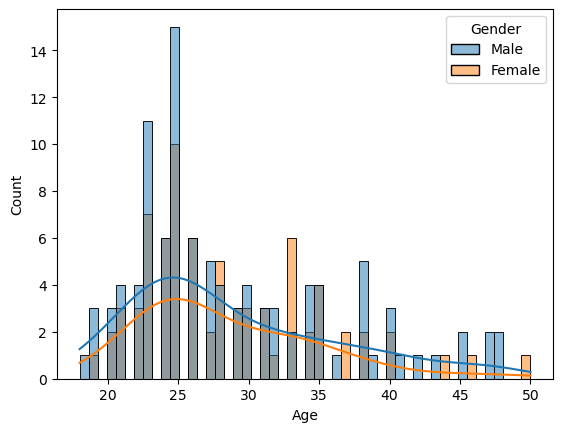

In [13]:
sns.histplot(x='Age', data=df, hue='Gender', bins=50, kde=True)

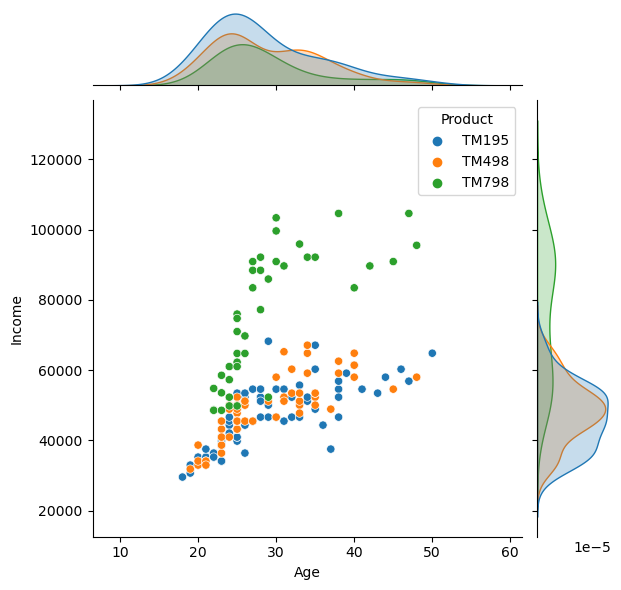

In [14]:
sns.jointplot(x='Age', y='Income', data=df, hue='Product')

<AxesSubplot:xlabel='Product', ylabel='count'>

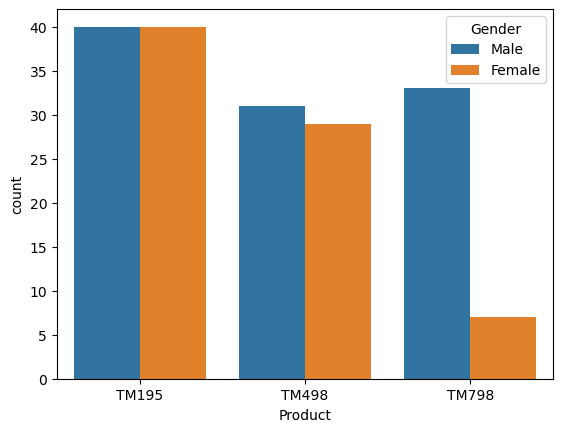

In [15]:
sns.countplot(x='Product', data=df, hue='Gender')

<AxesSubplot:xlabel='Fitness', ylabel='count'>

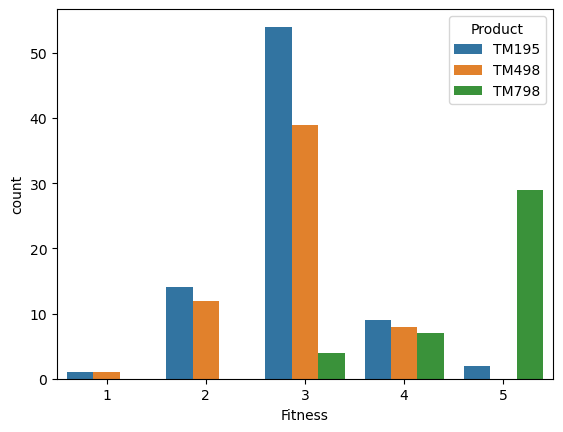

In [16]:
sns.countplot(x='Fitness', data=df, hue='Product')

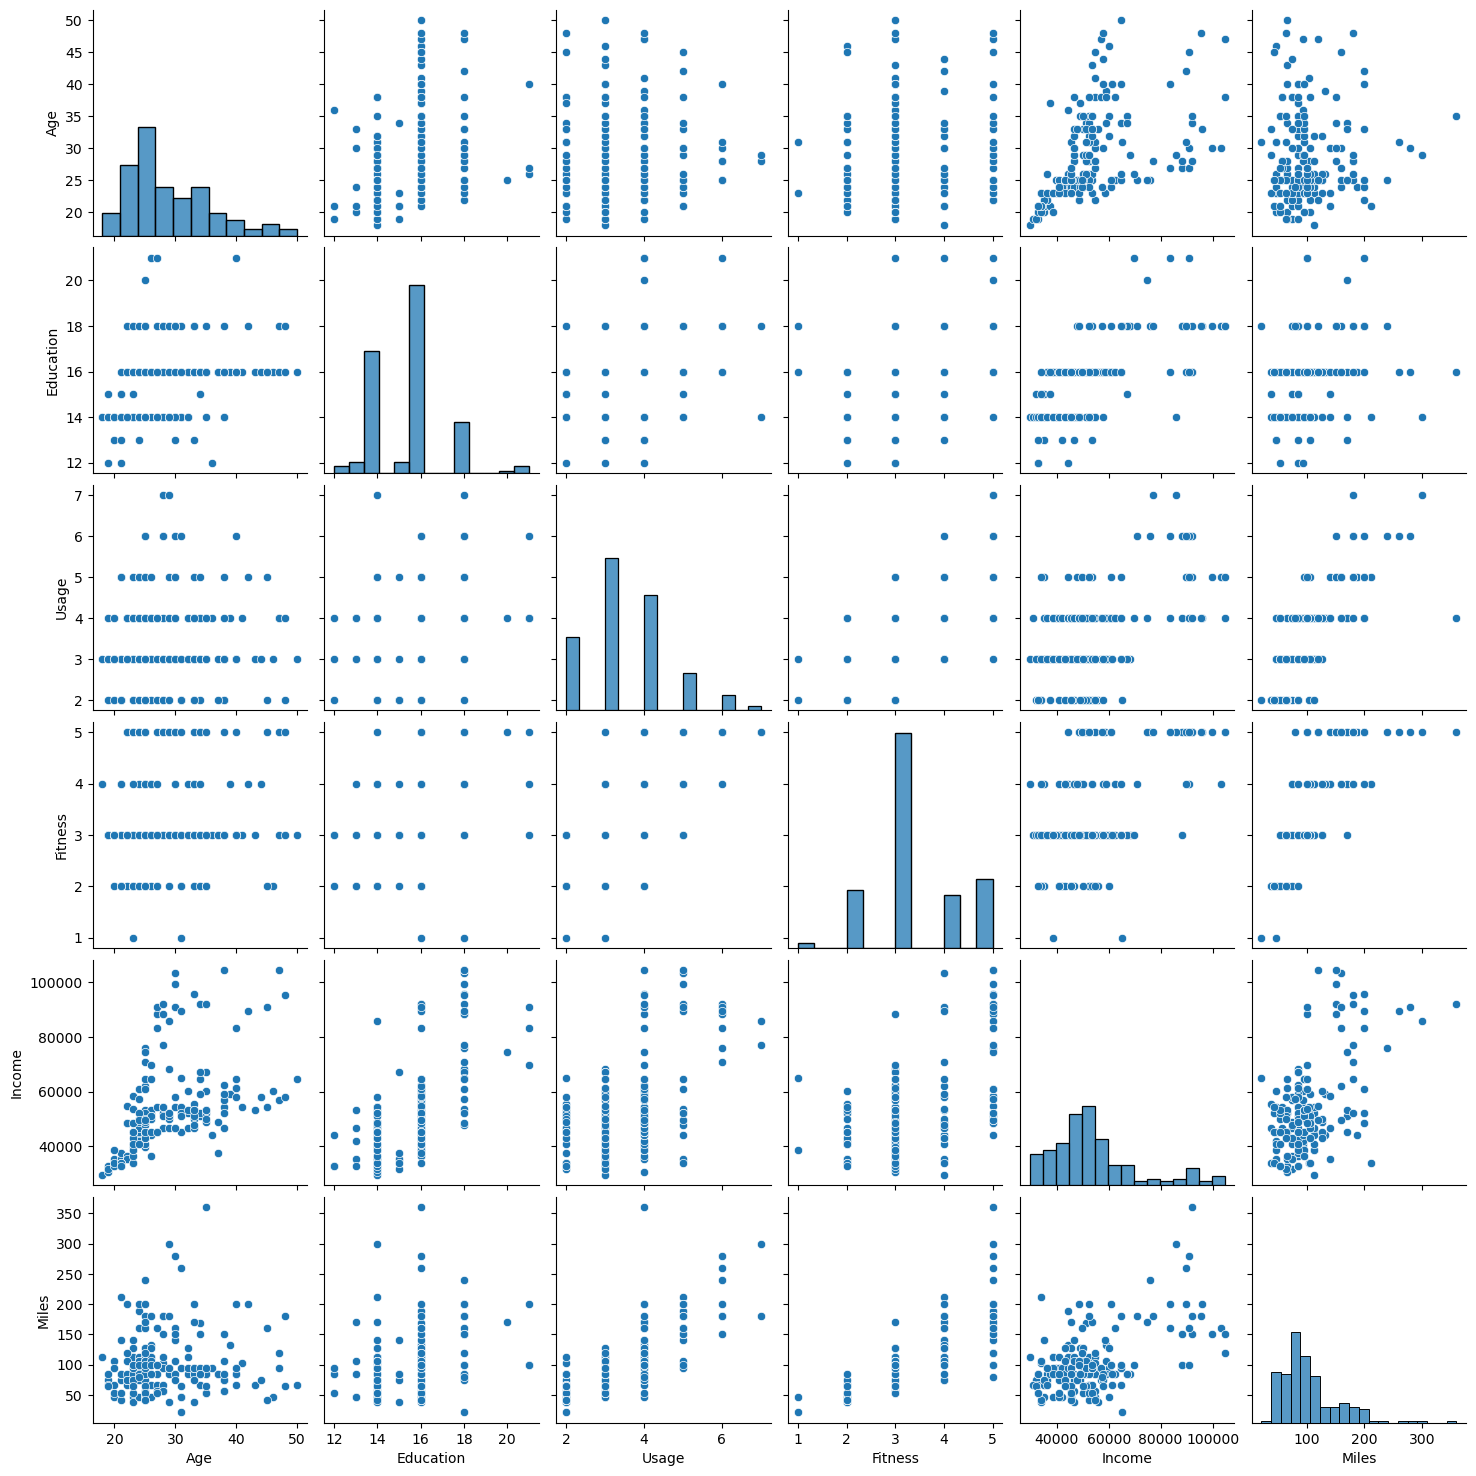

In [17]:
sns.pairplot(df)

<AxesSubplot:>

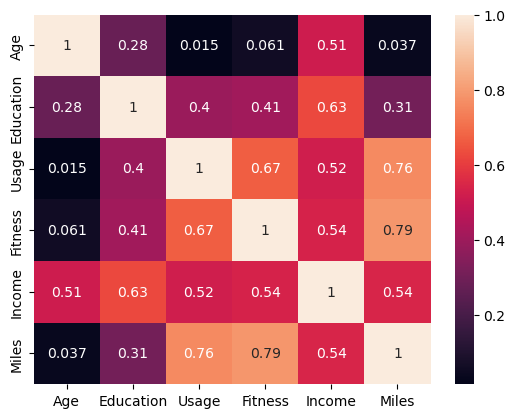

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
df.drop(['Fitness'], axis=1, inplace=True)

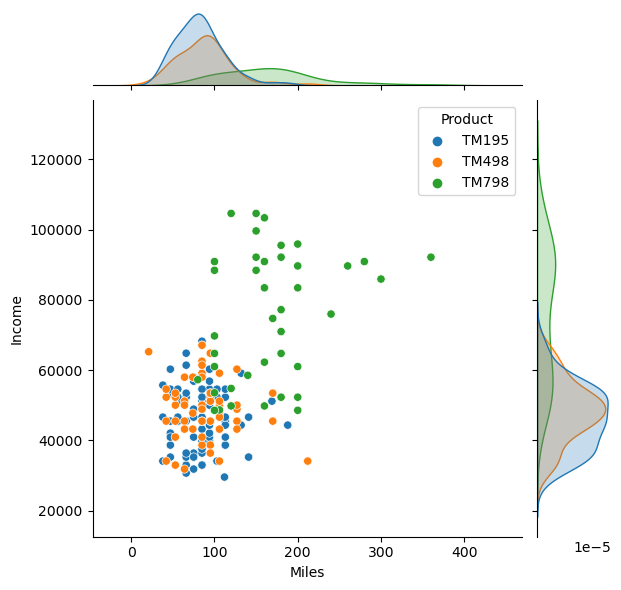

In [20]:
sns.jointplot(x='Miles', y='Income', data=df, hue='Product')

## Classification with 3 Classes and some categorical vars
### Logistic Regression (Multinomial)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

logreg = LogisticRegression(multi_class='multinomial')
onehot = OneHotEncoder(sparse=False, drop='first')
label = LabelEncoder()

In [64]:
df_logreg = df.copy()
df_logreg['Product_Enc'] = label.fit_transform(df['Product'])


In [65]:
df_logreg.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Income,Miles,Product_Enc
0,TM195,18,Male,14,Single,3,29562,112,0
1,TM195,19,Male,15,Single,2,31836,75,0
2,TM195,19,Female,14,Partnered,4,30699,66,0
3,TM195,19,Male,12,Single,3,32973,85,0
4,TM195,20,Male,13,Partnered,4,35247,47,0


In [66]:
encoded_data = onehot.fit_transform(df[['MaritalStatus','Gender']])
encoded_df = pd.DataFrame(encoded_data, columns=onehot.get_feature_names_out(['MaritalStatus','Gender']))
df_logreg = pd.concat((df_logreg, encoded_df), axis=1)

In [68]:
df_logreg.drop(['Product','Gender','MaritalStatus'], axis=1, inplace=True)

In [69]:
df_logreg

,Age,Education,Usage,Income,Miles,Product_Enc,MaritalStatus_Single,Gender_Male
0,18,14,3,29562,112,0,1.0,1.0
1,19,15,2,31836,75,0,1.0,1.0
2,19,14,4,30699,66,0,0.0,0.0
3,19,12,3,32973,85,0,1.0,1.0
4,20,13,4,35247,47,0,0.0,1.0
...,...,...,...,...,...,...,...,...
175,40,21,6,83416,200,2,1.0,1.0
176,42,18,5,89641,200,2,1.0,1.0
177,45,16,5,90886,160,2,1.0,1.0
178,47,18,4,104581,120,2,0.0,1.0


In [71]:
X = df_logreg.drop('Product_Enc', axis=1)
y = df_logreg['Product_Enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [3]:
from sklearn.metrics import classification_report, accuracy_score

acc = accuracy_score(y_test,y_pred)
acc

NameError: name 'y_test' is not defined

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62        25
           1       0.36      0.33      0.34        15
           2       0.92      0.86      0.89        14

    accuracy                           0.61        54
   macro avg       0.62      0.61      0.62        54
weighted avg       0.61      0.61      0.61        54



### Random Forest Classifier (requires numerical input in Sklearn!!)

In [25]:
label = LabelEncoder()
onehot = OneHotEncoder(sparse=False, drop='first')

In [26]:
df['Product'] = label.fit_transform(df['Product'])

In [27]:
encoded_data = onehot.fit_transform(df[['MaritalStatus','Gender']])
df = pd.concat((df, pd.DataFrame(encoded_data, columns=onehot.get_feature_names_out(['MaritalStatus','Gender']))), axis=1)

In [28]:
df.drop(['Gender','MaritalStatus'], axis=1, inplace=True)

In [29]:
df.head()

,Product,Age,Education,Usage,Income,Miles,MaritalStatus_Single,Gender_Male
0,0,18,14,3,29562,112,1.0,1.0
1,0,19,15,2,31836,75,1.0,1.0
2,0,19,14,4,30699,66,0.0,0.0
3,0,19,12,3,32973,85,1.0,1.0
4,0,20,13,4,35247,47,0.0,1.0


In [30]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Product', axis=1)
y = df['Product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [101]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        25
           1       0.33      0.33      0.33        15
           2       1.00      0.86      0.92        14

    accuracy                           0.63        54
   macro avg       0.65      0.62      0.64        54
weighted avg       0.64      0.63      0.63        54



## Gradien Boosting.. Why not?

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.50      0.47      0.48        15
           2       1.00      0.86      0.92        14

    accuracy                           0.72        54
   macro avg       0.74      0.71      0.72        54
weighted avg       0.73      0.72      0.72        54



In [34]:
confusion_matrix(y_test, y_pred)

array([[20,  5,  0],
       [ 8,  7,  0],
       [ 0,  2, 12]])